<a href="https://colab.research.google.com/github/gabrieldepaiva/Projetos_Financas-Python/blob/main/Proj4.Analise_Carteira_de_Acoes_Pessoal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das Bibliotecas Necessárias

In [1]:
#@title
import pandas as pd
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt
from google.colab.data_table import DataTable
print('Pacotes Necessários Carregados com Sucesso')

Pacotes Necessários Carregados com Sucesso


## Escolha dos ativos que compõem a carteira

In [2]:
#@title
print('Pesquisa rápida de cada código das ações das empresas listadas na bolsa de valores')
DataBase = pd.read_csv('https://raw.githubusercontent.com/gabrieldepaiva/Projetos_Financas-Python/main/Tickers.csv',sep=';')
DataTable(DataBase,include_index=False,num_rows_per_page=5)

Pesquisa rápida de cada código das ações das empresas listadas na bolsa de valores


,Empresa,Ticker
0,AES Tiete Energia SA Brazilian Units,TIET11.SA
1,AF Invest FII - Recebiveis Imobiliarios,AFCR11.SA
2,Aliansce Sonae Shopping Centers SA,ALSO3.SA
3,Alianza Trust Renda Imobiliaria FII,ALZR11.SA
4,Alpargatas SA,ALPA3.SA
...,...,...
398,XP Log Fundo de Investimento Imobiliario-FII,XPLG11.SA
399,XP Malls Fundo de Investimento Imobiliario,XPML11.SA
400,XP Properties FII - FII,XPPR11.SA
401,Xp Selection Fundo de Fundos Inv Imob Fii,XPSF11.SA


In [5]:
#@title
print('Usar a nomenclatura utilizada no Yahoo Finance. Ex: PETR4.SA:')
print('')

# Código Base para incluir os ativos na carteira
opcao = 1
carteira = []

carteira.append(input('Digite o nome do ativo. - '))
opcao = int(input('Deseja digitar outro ativo? [1] Sim / [2] Não - '))

while True:
  if opcao == 1:
    carteira.append(input('Digite o nome do ativo. - '))
    opcao = int(input('Deseja digitar outro ativo? [1] Sim / [2] Não - '))
  elif opcao != 1 and opcao != 2:
    opcao = int(input('Escolha entre [1] Sim / [2] Não - '))
  else:
    break

print('')
print(f'Sua carteira é composta pelos seguintes ativos: {carteira}')

Usar a nomenclatura utilizada no Yahoo Finance. Ex: PETR4.SA:

Digite o nome do ativo. - PETR4.SA
Deseja digitar outro ativo? [1] Sim / [2] Não - 2

Sua carteira é composta pelos seguintes ativos: ['PETR4.SA']


## Atribuindo os Pesos para esses Ativos

In [6]:
#@title
lista = [carteira]

pesos = []

try:
  for loc, ativo in enumerate(carteira):
    pesos.append(float(input(f'Escreva o peso do ativo {carteira[loc]} (somente o número) - '))/100)
except:
  print('')
  print('\033[31mO valor digitado resultou em um erro.\033[m')
  print('Favor executar esta célula novamente!')

# pode ser que não precise dessa parte do código
else:
  if sum(pesos) != 1:
    print('')
    print(f'\033[31mA soma dos pesos resultou em {sum(pesos)*100}%, a soma deve ser 100%!\033[31m')
    print('Favor executar esta célula novamente!')

Escreva o peso do ativo PETR4.SA (somente o número) - 100


## Importação da base de dados com as cotações diárias do Yahoo Finance

In [7]:
#@title
inicio = input('A partir de qual data? Colocar em formato americano. Ex: "ano"-"mês"-"dia" -->> ')
fiminput = input('Até de qual data? Colocar em formato americano. Ex: "ano"-"mês"-"dia" -->> ')

BaseDados = pd.DataFrame()

for acao in carteira:
  BaseDados[acao] = data.DataReader(acao, data_source = 'yahoo',start = inicio,end=fim)['Adj Close']

print('')
print('Importação dos dados realizada com sucesso!')

A partir de qual data? Colocar em formato americano. Ex: "ano"-"mês"-"dia" -->> 2020-01-01

Importação dos dados realizada com sucesso!


##### Resultado da tabela que foi gerada de forma parcial

In [8]:
#@title
# Resultado da tabela que foi gerada parcialmente
BaseDados.head()

,PETR4.SA
Date,
2020-01-02,30.697731
2020-01-03,30.447748
2020-01-06,30.807720
2020-01-07,30.687731
2020-01-08,30.497744


## Inclusão da coluna com o retorno diário da carteira 

In [9]:
#@title
# Retorno acumulado de cada ação

retorno_acumulado = ((BaseDados/BaseDados.iloc[0])-1)*100

##### Tabela gerada com os resultados consolidados

In [10]:
#@title
w = np.array(pesos)

ValorTotal = (retorno_acumulado * w)
ValorTotal['Retorno'] = ValorTotal.sum(axis=1)
ValorTotal.tail()

,PETR4.SA,Retorno
Date,,
2020-12-28,-8.201683,-8.201683
2020-12-29,-7.908502,-7.908502
2020-12-30,-7.680473,-7.680473
2021-01-04,-6.214564,-6.214564
2021-01-05,-5.856235,-5.856235


## Escolha dos Benchmarks

In [12]:
#@title
print('Usar a nomenclatura utilizada no Yahoo Finance. Ex: Para o Ibovespa, ^BVSP; para os fundos imobiliários, IFIX.SA e para o S&P 500 é ^GSPC')
print('')

benchmarks = []

q = 's'

q = input('Deseja incluir algum benchmark? Se sim, digite "s", caso contrário tecle "Enter" - ')
if q == 's':

  # inclusão dos benchmarks
  escolha = 1

  benchmarks.append(input('Digite o código do benchmark. - '))
  escolha = int(input('Deseja adicionar outro? [1] Sim / [2] Não - '))

  while True:
    if escolha == 1:
      benchmarks.append(input('Digite o nome do benchmark. - '))
      escolha = int(input('Deseja adicionar outro? [1] Sim / [2] Não - '))
    elif opcao != 1 and opcao != 2:
      opcao = int(input('Escolha entre [1] Sim / [2] Não - '))
    else:
      break

  print('')
  print(f'Os seguintes benchmarks foram incluídos : {benchmarks}')

Usar a nomenclatura utilizada no Yahoo Finance. Ex: Para o Ibovespa, ^BVSP; para os fundos imobiliários, IFIX.SA e para o S&P 500 é ^GSPC

Deseja incluir algum benchmark? Se sim, digite "s", caso contrário tecle "Enter" - s
Digite o código do benchmark. - ^BVSP
Deseja adicionar outro? [1] Sim / [2] Não - 2

Os seguintes benchmarks foram incluídos : ['^BVSP']


##### Importação dos dados dos benchmarks que foram escolhidos

In [13]:
#@title
#Os dados referentes aos benchmarks escolhidos serão importados para posterior análise

BaseDados2 = pd.DataFrame()

for indice in benchmarks:
  BaseDados2[indice] = data.DataReader(indice, data_source = 'yahoo',start = inicio)['Adj Close']

bmk_var_acum = ((BaseDados2/BaseDados2.iloc[0])-1)*100

print('Importação dos dados realizada com sucesso!')

Importação dos dados realizada com sucesso!


### Criação da Tabela Carteira X Benchmarks

In [14]:
#@title
# Criação da tabela com o retorno acumulado da carteira e dos benchmarks selecionados

tabela_final = pd.DataFrame()

tabela_final['Sua Carteira'] = ValorTotal['Retorno']

for i in benchmarks:
  tabela_final[i] = bmk_var_acum[i]

##### Resultado da tabela criada

In [15]:
#@title
tabela_final.head()

,Sua Carteira,^BVSP
Date,,
2020-01-02,0.000000,0.000000
2020-01-03,-0.814337,-0.730352
2020-01-06,0.358297,-1.429499
2020-01-07,-0.032576,-1.611665
2020-01-08,-0.651473,-1.961661


## Visualizações e Análises dos Dados Importados e Normalizados

##### Visualização dos ativos que compõem a carteira

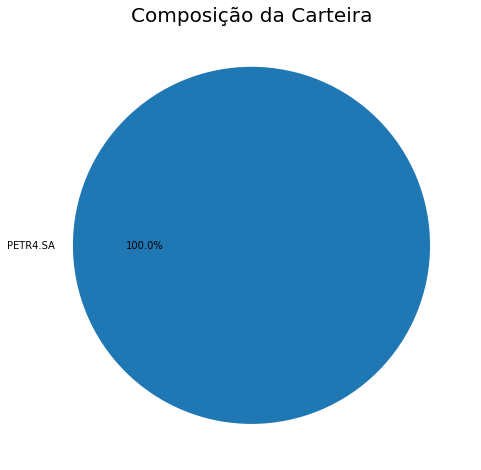

In [16]:
#@title
# Visualização da Representatividade na carteira
listafinal = []

valorinvestido = float(int(input('Quanto é o patrimônio da carteira?')))

for numero in pesos:
  listafinal.append(numero * valorinvestido)

listafinal

x_list = listafinal
labels_list = carteira
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.pie(x_list,autopct='%1.1f%%',labels=labels_list)
plt.title('Composição da Carteira',size=20)
print('')

##### Visualização das variações da carteira e benchmarks acumulados

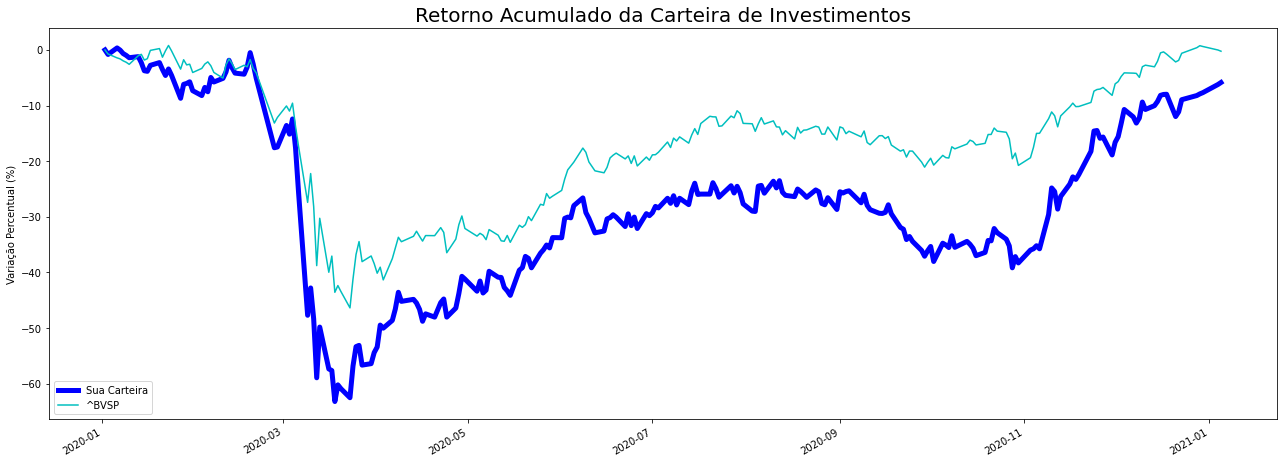

In [17]:
#@title
# Visualização das variações da carteira e benchmarks acumulados
cores = ['c','#368B8B','#276666','#276666','#0FA7A7']

tabela_final['Sua Carteira'].plot(color='b',LineWidth=5,figsize=(22,8))
for loc,j in enumerate(benchmarks):
  tabela_final[j].plot(color=cores[loc])
plt.legend()
plt.title ('Retorno Acumulado da Carteira de Investimentos',size=20)
plt.xlabel('')
plt.ylabel('Variação Percentual (%)')
print('')

##### Lista de Resultados da carteira analisada

In [18]:
#@title
BaseDados['Soma'] = BaseDados.sum(axis=1)

ret_cart = BaseDados['Soma'].pct_change().mean()*100
risco_cart = BaseDados['Soma'].pct_change().std()*100
linhas = BaseDados['Soma'].pct_change().count()
ret_acum_cart = tabela_final['Sua Carteira'].iloc[linhas]

print(f'Variação diária média da carteira: {round(ret_cart,2)}% a.p.')
print(f'Retorno acumulado da carteira: {round(ret_acum_cart,2)}% a.p.')
print(f'Risco da carteira: {round(risco_cart,2)}% a.p')
if q == 's':
  if '^BVSP' in tabela_final:
    ret_acum_ibov = tabela_final['^BVSP'].iloc[linhas]
    dci = round(((ret_acum_cart/ret_acum_ibov)-1)*100,2)
    print(f'Desempenho em relação ao Ibovespa: {dci}%.')
  else:
    print('')

Variação diária média da carteira: 0.07% a.p.
Retorno acumulado da carteira: -5.86% a.p.
Risco da carteira: 4.35% a.p
Desempenho em relação ao Ibovespa: 2414.63%.


# Visualizações Dinâmicas da Carteira

Funciona apenas caso seja executado em outro ambiente além do GitHub

In [19]:
import plotly.graph_objects as go

In [72]:
fig = go.Figure()
for loc,coluna in enumerate(tabela_final):
  fig.add_scatter(x=tabela_final.index, y=tabela_final[f'{coluna}'],name=f'{coluna}')
fig.update_layout(title_text="Retorno Acumulado da Carteira de Investimentos")
fig.show()

In [73]:
labels = carteira
values = listafinal

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.update_layout(title_text="Composição da Carteira")

fig.show()

In [74]:
# Composição da Carteira

labels = carteira
values = listafinal

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text="Composição da Carteira")
fig.show()

# Retorno Acumulado da Carteira de Investimentos
fig2 = go.Figure()
for loc,coluna in enumerate(tabela_final):
  fig2.add_scatter(x=tabela_final.index, y=tabela_final[f'{coluna}'],name=f'{coluna}')
fig2.update_layout(title_text="Retorno Acumulado da Carteira de Investimentos")
fig2.show()